In [ ]:
# Lab07 - Natural language processing (NLP)
## Nguyen Quoc Tuan - 19522476
## Link github: https://github.com/tuNQws/data_mining.git

In [ ]:
# I. Feature Engineering
# 1. Test Normalization

In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [ ]:
df=pd.read_csv("elonmusk_tweets.csv")

In [ ]:
df.shape

(2819, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [ ]:
df.describe()

,id
count,2.819000e+03
mean,5.804848e+17
std,2.186404e+17
min,1.543473e+10
25%,3.506818e+17
50%,6.569719e+17
75%,7.704732e+17
max,8.496369e+17


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def normalize(document):
    text = "".join([ch for ch in document if ch not in string.punctuation])
    
    tokens = word_tokenize(text)
    
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    
    return ret

original_documents = [x.strip() for x in df['text']]
documents = [normalize(d).split() for d in original_documents]
documents[0]

['band', 'so', 'the', 'robot', 'spare', 'human', 'httpstcov7jujqwfcv']

In [ ]:
import re

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>',
    r'(?:@[\w_]+)',
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-f][0-9a-f]))+',
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)',
    r"(?:[a-z][a-z'\-_]+[a-z])", 
    r'(?:[\w_]+)',
    r'(?:\S)'
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens  
original_documents = [x.strip() for x in df['text']]
documents = [preprocess(d) for d in original_documents]

documents[1]

['b',
 '"',
 '@ForIn2020',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Exactly',
 '.',
 'Tesla',
 'is',
 'absurdly',
 'overvalued',
 'if',
 'based',
 'on',
 'the',
 'past',
 ',',
 'but',
 "that's",
 'irr',
 '\\',
 'xe2',
 '\\',
 'x80',
 '\\',
 'xa6',
 'https://t.co/qQcTqkzgMl',
 '"']

In [ ]:
# 2. Implement TF-IDF

In [ ]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import math

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
flat_list = [word for doc in documents for word in doc]
# TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]
# TODO: we take the 500 most common words only
counts = Counter (words)
vocabulary = counts.most_common (500)
print([x for x in vocabulary if x[0] == 'Tesla']) 
vocabulary =  [x[0] for x in vocabulary]
assert len (vocabulary) == 500
#vocabulary.sort() 
vocabulary[:5]

[('Tesla', 272)]


['.', "'", 'b', '\\', '"']

In [ ]:
def idf(vocabulary, documents):
    idf_values = {}
    num_documents = len(documents)
    for term in vocabulary:
        count = sum(term in document for document in documents)
        idf_values[term] = math.log(num_documents / count, 2) 
    return idf_values

idf_values = idf(vocabulary, documents)
[idf_values[key] for key in vocabulary[:5]]

[0.959130577668125,
 0.7493007890060756,
 1.1177820471225408,
 3.0990239888351803,
 2.384152165519591]

In [ ]:
# 3. Compare the results with the reference implementation of scikit-learn library

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

# Convert the list of documents into a single string
corpus = [' '.join(doc) for doc in documents]

stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
print(stem_vectorizer.fit_transform(corpus))
print(stem_vectorizer.get_feature_names_out())

  (0, 617)	1
  (0, 6119)	1
  (0, 6613)	1
  (0, 5673)	1
  (0, 6186)	1
  (0, 3209)	1
  (0, 3203)	1
  (0, 1462)	1
  (0, 7106)	1
  (1, 6613)	1
  (1, 3203)	1
  (1, 1462)	1
  (1, 2667)	1
  (1, 7258)	1
  (1, 4284)	1
  (1, 1881)	1
  (1, 2392)	1
  (1, 6574)	1
  (1, 3488)	1
  (1, 403)	1
  (1, 4845)	1
  (1, 3277)	1
  (1, 897)	1
  (1, 4750)	1
  (1, 4935)	1
  :	:
  (2817, 2740)	1
  (2817, 3256)	1
  (2817, 5816)	1
  (2817, 3257)	1
  (2817, 1162)	1
  (2817, 7200)	1
  (2817, 5654)	1
  (2817, 7122)	1
  (2817, 4654)	1
  (2817, 5408)	1
  (2818, 3488)	1
  (2818, 6611)	1
  (2818, 6739)	1
  (2818, 6657)	1
  (2818, 441)	1
  (2818, 7271)	1
  (2818, 733)	1
  (2818, 4191)	2
  (2818, 924)	1
  (2818, 5189)	1
  (2818, 6906)	1
  (2818, 5055)	1
  (2818, 6143)	1
  (2818, 3281)	1
  (2818, 5167)	1
['00' '000' '01' ... 'zyfazr2bb2' 'zyv4h85o' 'zzijxxyy']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.metrics.pairwise import linear_kernel
tfidf = TfidfVectorizer (analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features=tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform (original_documents)

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words [0, idx]) for word, idx in tfidf.vocabulary_.items()]
print (sorted (words_freq, key = lambda x: x[1], reverse=True)[:5])
print('testla', corpus_tf_idf [1, features.vocabulary_['tesla']])

[('http', 163.54366542841234), ('https', 151.85039944652075), ('rt', 112.61998731390989), ('tesla', 95.96401470715628), ('xe2', 88.20944486346477)]
testla 0.3495243100660956


4. Apply TF-IDF for information retrieval

In [ ]:
import numpy as np
import math
from nltk.stem import PorterStemmer

def cosine_similarity(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += x * x
        sumyy += y * y
        sumxy += x * y
    if sumxy == 0:
        result = 0
    else:
        result = sumxy / math.sqrt(sumxx * sumyy)
    return result

def search_vec(query, k, vocabulary, stemmer, document_vectors, original_documents):
    q = query.split()
    q = [stemmer.stem(w) for w in q]
    query_vector = vectorize(q, vocabulary, idf)

    # Rank the documents by cosine similarity
    scores = [[cosine_similarity(query_vector, document_vectors[d]), d] for d in range(len(document_vectors))]
    scores.sort(key=lambda x: -x[0])

    print('Top-{0} documents'.format(k))
    for i in range(k):
        print(i, original_documents[scores[i][1]])

query = "tesla nasa"
stemmer = PorterStemmer()
document_vectors = words_freq  # Assuming words_freq is defined elsewhere
vocabulary = ...  # Define your vocabulary
idf = ...  # Define your idf values
original_documents = ...  # Define your original documents

search_vec(query, 5, vocabulary, stemmer, document_vectors, original_documents)

II. Text Processing

1. Preprocessing

In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df=pd.read_csv("coldplay.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  120 non-null    object
 1   Song    120 non-null    object
 2   Link    120 non-null    object
 3   Lyrics  120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [ ]:
song_title = 'Every Teardrop Is A Waterfall'
lyrics = df.loc[df['Song'] == song_title, 'Lyrics'].values[0]
print(lyrics)

I turn the music up, I got my records on  
I shut the world outside until the lights come on  
Maybe the streets alight, maybe the trees are gone  
I feel my heart start beating to my favourite song  
  
And all the kids they dance, all the kids all night  
Until Monday morning feels another life  
I turn the music up  
I'm on a roll this time  
And heaven is in sight  
  
I turn the music up, I got my records on  
From underneath the rubble sing a rebel song  
Don't want to see another generation drop  
I'd rather be a comma than a full stop  
  
Maybe I'm in the black, maybe I'm on my knees  
Maybe I'm in the gap between the two trapezes  
But my heart is beating and my pulses start  
Cathedrals in my heart  
  
As we saw oh this light I swear you, emerge blinking into  
To tell me it's alright  
As we soar walls, every siren is a symphony  
And every tear's a waterfall  
Is a waterfall  
Oh  
Is a waterfall  
Oh oh oh  
Is a is a waterfall  
Every tear  
Is a waterfall  
Oh oh oh  


In [ ]:
import nltk
import string


# Tokenize the lyrics
from nltk import word_tokenize
words = word_tokenize(lyrics)
print(words)

['I', 'turn', 'the', 'music', 'up', ',', 'I', 'got', 'my', 'records', 'on', 'I', 'shut', 'the', 'world', 'outside', 'until', 'the', 'lights', 'come', 'on', 'Maybe', 'the', 'streets', 'alight', ',', 'maybe', 'the', 'trees', 'are', 'gone', 'I', 'feel', 'my', 'heart', 'start', 'beating', 'to', 'my', 'favourite', 'song', 'And', 'all', 'the', 'kids', 'they', 'dance', ',', 'all', 'the', 'kids', 'all', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'the', 'music', 'up', 'I', "'m", 'on', 'a', 'roll', 'this', 'time', 'And', 'heaven', 'is', 'in', 'sight', 'I', 'turn', 'the', 'music', 'up', ',', 'I', 'got', 'my', 'records', 'on', 'From', 'underneath', 'the', 'rubble', 'sing', 'a', 'rebel', 'song', 'Do', "n't", 'want', 'to', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'be', 'a', 'comma', 'than', 'a', 'full', 'stop', 'Maybe', 'I', "'m", 'in', 'the', 'black', ',', 'maybe', 'I', "'m", 'on', 'my', 'knees', 'Maybe', 'I', "'m", 'in', 'the', 'gap', 'betwe

In [ ]:
tokens_without_punctuation = [token for token in words if token not in string.punctuation]

print(tokens_without_punctuation)

['I', 'turn', 'the', 'music', 'up', 'I', 'got', 'my', 'records', 'on', 'I', 'shut', 'the', 'world', 'outside', 'until', 'the', 'lights', 'come', 'on', 'Maybe', 'the', 'streets', 'alight', 'maybe', 'the', 'trees', 'are', 'gone', 'I', 'feel', 'my', 'heart', 'start', 'beating', 'to', 'my', 'favourite', 'song', 'And', 'all', 'the', 'kids', 'they', 'dance', 'all', 'the', 'kids', 'all', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'the', 'music', 'up', 'I', "'m", 'on', 'a', 'roll', 'this', 'time', 'And', 'heaven', 'is', 'in', 'sight', 'I', 'turn', 'the', 'music', 'up', 'I', 'got', 'my', 'records', 'on', 'From', 'underneath', 'the', 'rubble', 'sing', 'a', 'rebel', 'song', 'Do', "n't", 'want', 'to', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'be', 'a', 'comma', 'than', 'a', 'full', 'stop', 'Maybe', 'I', "'m", 'in', 'the', 'black', 'maybe', 'I', "'m", 'on', 'my', 'knees', 'Maybe', 'I', "'m", 'in', 'the', 'gap', 'between', 'the', 'two', 'trape

In [ ]:


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
 
# converts the words in word_tokens to lower case and then checks whether
#they are present in stopwords or not
filtered_sentence = [w for w in words if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(filtered_sentence)

['I', 'turn', 'music', ',', 'I', 'got', 'records', 'I', 'shut', 'world', 'outside', 'lights', 'come', 'Maybe', 'streets', 'alight', ',', 'maybe', 'trees', 'gone', 'I', 'feel', 'heart', 'start', 'beating', 'favourite', 'song', 'And', 'kids', 'dance', ',', 'kids', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'music', 'I', "'m", 'roll', 'time', 'And', 'heaven', 'sight', 'I', 'turn', 'music', ',', 'I', 'got', 'records', 'From', 'underneath', 'rubble', 'sing', 'rebel', 'song', 'Do', "n't", 'want', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'comma', 'full', 'stop', 'Maybe', 'I', "'m", 'black', ',', 'maybe', 'I', "'m", 'knees', 'Maybe', 'I', "'m", 'gap', 'two', 'trapezes', 'But', 'heart', 'beating', 'pulses', 'start', 'Cathedrals', 'heart', 'As', 'saw', 'oh', 'light', 'I', 'swear', ',', 'emerge', 'blinking', 'To', 'tell', "'s", 'alright', 'As', 'soar', 'walls', ',', 'every', 'siren', 'symphony', 'And', 'every', 'tear', "'s", 'waterfall', 'I

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_sentence]
print(lemmatized_tokens)

['I', 'turn', 'music', ',', 'I', 'got', 'record', 'I', 'shut', 'world', 'outside', 'light', 'come', 'Maybe', 'street', 'alight', ',', 'maybe', 'tree', 'gone', 'I', 'feel', 'heart', 'start', 'beating', 'favourite', 'song', 'And', 'kid', 'dance', ',', 'kid', 'night', 'Until', 'Monday', 'morning', 'feel', 'another', 'life', 'I', 'turn', 'music', 'I', "'m", 'roll', 'time', 'And', 'heaven', 'sight', 'I', 'turn', 'music', ',', 'I', 'got', 'record', 'From', 'underneath', 'rubble', 'sing', 'rebel', 'song', 'Do', "n't", 'want', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'comma', 'full', 'stop', 'Maybe', 'I', "'m", 'black', ',', 'maybe', 'I', "'m", 'knee', 'Maybe', 'I', "'m", 'gap', 'two', 'trapeze', 'But', 'heart', 'beating', 'pulse', 'start', 'Cathedrals', 'heart', 'As', 'saw', 'oh', 'light', 'I', 'swear', ',', 'emerge', 'blinking', 'To', 'tell', "'s", 'alright', 'As', 'soar', 'wall', ',', 'every', 'siren', 'symphony', 'And', 'every', 'tear', "'s", 'waterfall', 'Is', 'waterfa

In [ ]:
from nltk import pos_tag
pos_tags = nltk.pos_tag(lemmatized_tokens)

print(pos_tags)

[('I', 'PRP'), ('turn', 'VBP'), ('music', 'NN'), (',', ','), ('I', 'PRP'), ('got', 'VBD'), ('record', 'NN'), ('I', 'PRP'), ('shut', 'VBP'), ('world', 'NN'), ('outside', 'IN'), ('light', 'JJ'), ('come', 'VBP'), ('Maybe', 'NNP'), ('street', 'NN'), ('alight', 'NN'), (',', ','), ('maybe', 'RB'), ('tree', 'IN'), ('gone', 'VBN'), ('I', 'PRP'), ('feel', 'VBP'), ('heart', 'NN'), ('start', 'NN'), ('beating', 'VBG'), ('favourite', 'NN'), ('song', 'NN'), ('And', 'CC'), ('kid', 'NN'), ('dance', 'NN'), (',', ','), ('kid', 'VB'), ('night', 'NN'), ('Until', 'IN'), ('Monday', 'NNP'), ('morning', 'NN'), ('feel', 'NN'), ('another', 'DT'), ('life', 'NN'), ('I', 'PRP'), ('turn', 'VBP'), ('music', 'NN'), ('I', 'PRP'), ("'m", 'VBP'), ('roll', 'JJ'), ('time', 'NN'), ('And', 'CC'), ('heaven', 'JJ'), ('sight', 'NN'), ('I', 'PRP'), ('turn', 'VBP'), ('music', 'NN'), (',', ','), ('I', 'PRP'), ('got', 'VBD'), ('record', 'NN'), ('From', 'IN'), ('underneath', 'JJ'), ('rubble', 'JJ'), ('sing', 'VBG'), ('rebel', 'NN')

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    output = np.asarray(pos_tag)
    for i in range(len(pos_tag)):
        if pos_tag[i][1].startswith('J'):
            output[i][1] = wordnet.ADJ
        elif pos_tag[i][1].startswith('V'):
            output[i][1] = wordnet.VERB
        elif pos_tag[i][1].startswith('R'):
            output[i][1] = wordnet.ADV
        else:
            output[i][1] = wordnet.NOUN
    return output

2. Bag-of-words

In [ ]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df=pd.read_csv("coldplay.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(df['Lyrics'])

print( bow.shape)

(120, 1776)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe from the BOW matrix and feature names
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names)

bow_df

,10,2000,2gether,76543,aaaaaah,aaaaah,aaaah,about,above,achin,...,yellow,yes,yesterday,yet,you,young,your,yours,yourself,yuletide
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,4,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,3,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
117,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,0,4,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,0,1,0,0,0


In [ ]:
sum_bow = bow_df.sum()
sum_bow.idxmax()

'you'

In [ ]:
word_counts = bow_df.sum()
top_10_words = word_counts.nlargest(10)

# Print the top 10 words
print(top_10_words)

you    994
the    777
and    650
to     481
it     458
oh     334
in     318
me     314
my     288
on     285
dtype: int64


II. Text Similarity

1. Similarity metrics

In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
A = "Outside the classroom, Stallman pursued his studies with even more diligence, rushing off to fulfill his laboratory-assistant duties at Rockefeller University during the week and dodging the Vietnam protesters on his way to Saturday school at Columbia. It was there, while the rest of the Science Honors Program students sat around discussing their college choices, that Stallman finally took a moment to participate in the preclass bull session."
B = "To facilitate the process, AI Lab hackers had built a system that displayed both the source and display modes on a split screen. Despite this innovative hack, switching from mode to mode was still a nuisance."
C = "With no dorm and no dancing, Stallman's social universe imploded. Like an astronaut experiencing the aftereffects of zero-gravity, Stallman found that his ability to interact with nonhackers, especially female nonhackers, had atrophied significantly. After 16 weeks in the AI Lab, the self confidence he'd been quietly accumulating during his 4 years at Harvard was virtually gone."

In [ ]:
set_A = set(A.lower().split())
set_B = set(B.lower().split())
set_C = set(C.lower().split())

# Compute the intersection and union
intersection_AB = len(set_A.intersection(set_B))
union_AB = len(set_A.union(set_B))

intersection_AC = len(set_A.intersection(set_C))
union_AC = len(set_A.union(set_C))

intersection_BC = len(set_B.intersection(set_C))
union_BC = len(set_B.union(set_C))

# Compute and print the Jaccard Similarity
jaccard_AB = intersection_AB / union_AB
jaccard_AC = intersection_AC / union_AC
jaccard_BC = intersection_BC / union_BC

print("Jaccard Similarity between A and B:", jaccard_AB)
print("Jaccard Similarity between A and C:", jaccard_AC)
print("Jaccard Similarity between B and C:", jaccard_BC)

Jaccard Similarity between A and B: 0.08641975308641975
Jaccard Similarity between A and C: 0.12631578947368421
Jaccard Similarity between B and C: 0.0945945945945946


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF for sentences A, B, and C
tfidf = vectorizer.fit_transform([A, B, C])

# Calculate cosine similarities
cosine_sim_AB = cosine_similarity(tfidf[0], tfidf[1])
cosine_sim_BC = cosine_similarity(tfidf[1], tfidf[2])
cosine_sim_AC = cosine_similarity(tfidf[0], tfidf[2])

# Print cosine similarities
print("cos(A, B):", cosine_sim_AB)
print("cos(B, C):", cosine_sim_BC)
print("cos(A, C):", cosine_sim_AC)

cos(A, B): [[0.1679327]]
cos(B, C): [[0.13618963]]
cos(A, C): [[0.2850296]]


2. TF-IDF

In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("headlines.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
df.head(10)

,publish_date,headline_text
0,20170721,algorithms can make decisions on behalf of fed...
1,20170721,andrew forrests fmg to appeal pilbara native t...
2,20170721,a rural mural in thallan
3,20170721,australia church risks becoming haven for abusers
4,20170721,australian company usgfx embroiled in shanghai...
5,20170721,australia suffers shock loss in womens world c...
6,20170721,big rigs
7,20170721,boy charged in connection with supermarket syr...
8,20170721,breaking bad creator vince gilligan on success...
9,20170721,breaking bad creator vince gilligan on walter ...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
df['tokens'] = df['headline_text'].apply(lambda x: word_tokenize(x))

# Remove punctuation
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Join tokens back into a single string
df['Stem'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['tokens']

0         [algorithm, make, decis, behalf, feder, minist]
1       [andrew, forrest, fmg, appeal, pilbara, nativ,...
2                                 [rural, mural, thallan]
3                  [australia, church, risk, becom, abus]
4       [australian, compani, usgfx, embroil, shanghai...
                              ...                        
1994    [constitut, avenu, win, top, prize, act, archi...
1995                         [dark, mofo, number, crunch]
1996    [david, petraeu, say, australia, must, firm, s...
1997    [driverless, car, australia, face, challeng, r...
1998               [drug, compani, criticis, price, hike]
Name: tokens, Length: 1999, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['tokens'])
bow = vectorizer.transform(df['tokens'])

print(bow.shape)

(1999, 4271)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['Stem'])


tfidf = vectorizer.transform(df['Stem'])

tfidf_array = tfidf.toarray()

all_zeros = (tfidf_array == 0).all()

if not all_zeros:
    print(tfidf_array[0])

[0.3943827  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.24444796 0.12987231 0.10011226 0.21470886 0.40884261 0.29023513
 0.12972179 0.23484967 0.34095845 0.         0.15309538 0.18376484
 0.32930567 0.08609939 0.08749485 0.         0.         0.16659404
 0.18357889 0.17297874 0.         0.         0.         0.
 0.         0.        ]


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer=lambda x: x)


vectorizer.fit(df['tokens'])


tfidf = vectorizer.transform(df['tokens'])


tfidf_array = tfidf.toarray()


average_tfidf = np.mean(tfidf_array, axis=0)


highest_indices = np.argsort(-average_tfidf)[:10]  # Use negative sign for descending order
lowest_indices = np.argsort(average_tfidf)[:10]

feature_names = vectorizer.get_feature_names_out()


print("Words with the highest average TF-IDF:")
for index in highest_indices:
    print(feature_names[index], average_tfidf[index])


print("\nWords with the lowest average TF-IDF:")
for index in lowest_indices:
    print(feature_names[index], average_tfidf[index])

Words with the highest average TF-IDF:
australia 0.009983014998891405
australian 0.00969733014866161
new 0.008703107457097207
polic 0.0077360592047481126
say 0.007540459757782178
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829903
sydney 0.0056424159732095394

Words with the lowest average TF-IDF:
nmfc 0.0001527054029533165
coll 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
adel 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
gw 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.0001613676677950104


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = df['tokens'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(documents)

In [ ]:
import numpy as np

# Assuming you have computed the TF-IDF representation and stored it in 'tfidf'

# Compute the average TF-IDF values for each feature (word)
average_tfidf = np.mean(tfidf.toarray(), axis=0)

# Get the indices of the words with the highest and lowest average TF-IDF values
highest_indices = np.argsort(-average_tfidf)[:10]  # Use negative sign for descending order
lowest_indices = np.argsort(average_tfidf)[:10]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the words with the highest average TF-IDF values
print("Words with the highest average TF-IDF:")
for index in highest_indices:
    print(feature_names[index], average_tfidf[index])

# Print the words with the lowest average TF-IDF values
print("\nWords with the lowest average TF-IDF:")
for index in lowest_indices:
    print(feature_names[index], average_tfidf[index])

Words with the highest average TF-IDF:
australia 0.009983014998891405
australian 0.009729510942149733
new 0.008703107457097207
polic 0.007736059204748111
say 0.007555848605072935
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829904
sydney 0.005659788840016151

Words with the lowest average TF-IDF:
adel 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
coll 0.0001527054029533165
gw 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
nmfc 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.00016136766779501044


3. Plagiarism checker

In [ ]:
file = open('A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('Dsource.txt', 'r') 
D0 = file.readlines()[0]


In [ ]:
C0

'Descartes has been heralded as the first modern philosopher. He is famous for having made an important connection between geometry and algebra, which allowed for the solving of geometrical problems by way of algebraic equations. He is also famous for having promoted a new conception of matter, which allowed for the accounting of physical phenomena by way of mechanical explanations. However, he is most famous for having written a relatively short work, Meditationes de Prima Philosophia (Meditations On First Philosophy), published in 1641, in which he provides a philosophical groundwork for the possibility of the sciences. (Smith, 2007).\n'

In [ ]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvect = TfidfVectorizer()
tfvect.fit(alldata)


tfidf = tfvect.fit_transform(alldata).toarray()
# Compute the TF-IDF representation for each document
TFIDFA = tfvect.transform([A0, A1]).toarray()
TFIDFB = tfvect.transform([B0, B1]).toarray()
TFIDFC = tfvect.transform([C0, C1]).toarray()
TFIDFD = tfvect.transform([D0, D1, D2]).toarray()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise similarity for document A
similarityAA = cosine_similarity(TFIDFA, TFIDFA)

# Compute pairwise similarity for document B
similarityBB = cosine_similarity(TFIDFB, TFIDFB)

# Compute pairwise similarity for document C
similarityCC = cosine_similarity(TFIDFC, TFIDFC)

# Compute pairwise similarity for document D
similarityDD = cosine_similarity(TFIDFD, TFIDFD)

# Compute pairwise similarity for all documents
similarityAll = cosine_similarity(tfidf, tfidf)

In [ ]:
similarityAA

array([[1.        , 0.81898863],
       [0.81898863, 1.        ]])

In [ ]:
similarityBB

array([[1.        , 0.63747903],
       [0.63747903, 1.        ]])

In [ ]:
similarityCC

array([[1.        , 0.85723864],
       [0.85723864, 1.        ]])

In [ ]:
similarityDD

array([[1.        , 0.92754461, 0.45775827],
       [0.92754461, 1.        , 0.47179638],
       [0.45775827, 0.47179638, 1.        ]])

In [ ]:
similarityAll

array([[1.        , 0.81898863, 0.10748497, 0.12736224, 0.24491604,
        0.29501242, 0.2530779 , 0.2146434 , 0.18585492],
       [0.81898863, 1.        , 0.10940658, 0.12644471, 0.21239125,
        0.25583485, 0.214717  , 0.17937458, 0.16807197],
       [0.10748497, 0.10940658, 1.        , 0.63747903, 0.08804551,
        0.09372089, 0.08509508, 0.07946359, 0.10627147],
       [0.12736224, 0.12644471, 0.63747903, 1.        , 0.08730757,
        0.08893992, 0.12527568, 0.1207279 , 0.12910021],
       [0.24491604, 0.21239125, 0.08804551, 0.08730757, 1.        ,
        0.85723864, 0.20151171, 0.16200275, 0.14447728],
       [0.29501242, 0.25583485, 0.09372089, 0.08893992, 0.85723864,
        1.        , 0.22326634, 0.1806631 , 0.1558733 ],
       [0.2530779 , 0.214717  , 0.08509508, 0.12527568, 0.20151171,
        0.22326634, 1.        , 0.92754461, 0.45775827],
       [0.2146434 , 0.17937458, 0.07946359, 0.1207279 , 0.16200275,
        0.1806631 , 0.92754461, 1.        , 0.47179638],


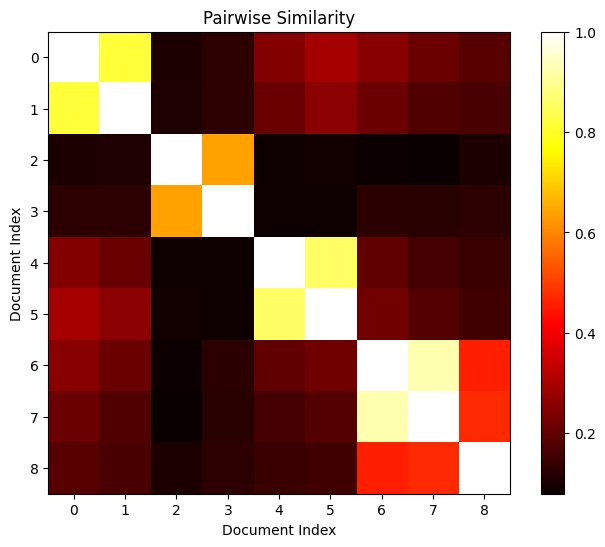

In [ ]:
import matplotlib.pyplot as plt
pred_plagiarism = similarityAll>0.2
# Function to plot the pairwise similarity matrix
def plot_similarity(similarity_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Pairwise Similarity')
    plt.xlabel('Document Index')
    plt.ylabel('Document Index')
    plt.show()



# Plot the pairwise similarity for all documents
plot_similarity(similarityAll)

In [ ]:
import numpy as np

# Initialize the true labels matrix
real_plagiarism = np.zeros((9, 9))

# Set the true labels for plagiarized pairs
real_plagiarism[0:2, 0:2] = 1  # A0 and A1 are plagiarized
real_plagiarism[2:4, 2:4] = 1  # B0 and B1 are plagiarized
real_plagiarism[4:6, 4:6] = 1  # C0 and C1 are plagiarized
real_plagiarism[6:9, 6:9] = 1  # D0, D1, and D2 are plagiarized

# Print the true labels matrix
print(real_plagiarism)

[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]]


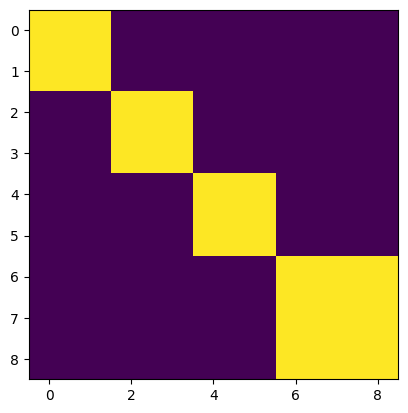

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert similarity matrix to binary predictions
threshold = 0.5
binary_predictions_All = (similarityAll > threshold).astype(int).flatten()

# Convert true labels matrix to binary labels
true_labels = real_plagiarism.flatten()

# Compute accuracy score
accuracy_All = accuracy_score(true_labels, binary_predictions_All)

print("Accuracy for All Documents:", accuracy_All)

Accuracy for All Documents: 0.9506172839506173


III. Text Classification

In [ ]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

print(df.head())

  Class                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head(10)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define the preprocess_text function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens_lower = [token.lower() for token in tokens]
    
    # Stopword Removal
    stop_words = set(stopwords.words('english'))  # Specify 'latin-1' stopwords
    tokens_no_stopwords = [token for token in tokens_lower if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(token) for token in tokens_no_stopwords]
    
    # Return preprocessed tokens as a string
    return ' '.join(tokens_stemmed)

df['preprocessed_text'] = df['Message'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['preprocessed_text']

0       go jurong point , crazi .. avail bugi n great ...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkt 21...
3             u dun say earli hor ... u c alreadi say ...
4              nah n't think goe usf , live around though
                              ...                        
5567    2nd time tri 2 contact u. u ï¿½750 pound prize...
5568                         ï¿½_ b go esplanad fr home ?
5569                        piti , * mood . ... suggest ?
5570    guy bitch act like 'd interest buy someth els ...
5571                                     rofl . true name
Name: preprocessed_text, Length: 5572, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(df['preprocessed_text'])

print( bow.shape)

(5572, 7495)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe from the BOW matrix and feature names
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names)

bow_df

,00,000,000pe,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,½t,½te,½v,½wel,½ï,½û,½ûªm,½ûªt,½ûªv,ì¼1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


IV. Topic Modelling

In [ ]:
import pandas as pd
df = pd.read_csv('random_headlines.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,publish_date,headline_text
0,20120305,ute driver hurt in intersection crash
1,20081128,6yo dies in cycling accident
2,20090325,bumper olive harvest expected
3,20100201,replica replaces northernmost sign
4,20080225,woods targets perfect season
5,20091120,leckie salvages dramatic draw for adelaide
6,20031024,group to gauge rail services future
7,20130304,anti hunting rally still going ahead
8,20081115,dr congo refugees receive first aid
9,20130304,thailand signs agreement with muslim rebels


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   20000 non-null  int64 
 1   headline_text  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['lowercase'] = df['headline_text'].str.lower()
df['tokens'] = df['lowercase'].apply(word_tokenize)
df['no_punctuation'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
stopwords_set = set(stopwords.words('english'))
df['no_stopwords'] = df['no_punctuation'].apply(lambda tokens: [token for token in tokens if token not in stopwords_set])
stemmer = PorterStemmer()
df['stemmed'] = df['no_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['stemmed']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                    [ute, driver, hurt, intersect, crash]
1                                  [6yo, die, cycl, accid]
2                          [bumper, oliv, harvest, expect]
3                    [replica, replac, northernmost, sign]
4                          [wood, target, perfect, season]
                               ...                        
19995               [judg, attack, walkinshaw, run, arrow]
19996           [polish, govt, collaps, elect, held, next]
19997                              [drum, friday, may, 29]
19998            [winterbottom, bathurst, provision, pole]
19999    [pull, pork, pawpaw, salad, local, success, st...
Name: stemmed, Length: 20000, dtype: object

In [ ]:
!pip install gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from gensim.corpora import Dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary of the tokens
dictionary = Dictionary(df['stemmed'])

# Filter out rare and common tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert each headline to its BOW representation
df['bow'] = df['stemmed'].apply(lambda tokens: dictionary.doc2bow(tokens))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['bow']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                         [(0, 1), (1, 1), (2, 1), (3, 1)]
1                                 [(4, 1), (5, 1), (6, 1)]
2                                 [(7, 1), (8, 1), (9, 1)]
3                                       [(10, 1), (11, 1)]
4                     [(12, 1), (13, 1), (14, 1), (15, 1)]
                               ...                        
19995                        [(94, 1), (612, 1), (791, 1)]
19996    [(306, 1), (502, 1), (1125, 1), (1279, 1), (16...
19997            [(122, 1), (362, 1), (435, 1), (1929, 1)]
19998                                [(129, 1), (2498, 1)]
19999    [(767, 1), (1327, 1), (1500, 1), (1927, 1), (2...
Name: bow, Length: 20000, dtype: object

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary of the tokens
dictionary = Dictionary(df['stemmed'])

# Filter out rare and common tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert each headline to its BOW representation
df['bow'] = df['stemmed'].apply(lambda tokens: dictionary.doc2bow(tokens))

# Create a list of BOW representations
bow_corpus = df['bow'].tolist()

# Create the TF-IDF model
tfidf_model = TfidfModel(bow_corpus)

# Convert each BOW representation to TF-IDF representation
df['tfidf'] = df['bow'].apply(lambda bow: tfidf_model[bow])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['tfidf']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [(0, 0.38380472505678387), (1, 0.4408152091819...
1        [(4, 0.565040562691219), (5, 0.678282623325040...
2        [(7, 0.4778523954688469), (8, 0.56145873585743...
3        [(10, 0.7596694993542321), (11, 0.650309350809...
4        [(12, 0.5937887452228604), (13, 0.432499245079...
                               ...                        
19995    [(94, 0.6788936377183876), (612, 0.47999246040...
19996    [(306, 0.3169859350661769), (502, 0.2621260609...
19997    [(122, 0.37474224836119696), (362, 0.485431117...
19998    [(129, 0.6582992963848873), (2498, 0.752756292...
19999    [(767, 0.43161038088504416), (1327, 0.42560245...
Name: tfidf, Length: 20000, dtype: object

In [ ]:
from gensim.models import  LsiModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert each BOW representation to TF-IDF representation
df['tfidf'] = df['bow'].apply(lambda bow: tfidf_model[bow])

# Create the LSA model
lsa_model = LsiModel(df['tfidf'], num_topics=10, id2word=dictionary)

# Convert each TF-IDF representation to LSA representation
df['lsa'] = df['tfidf'].apply(lambda tfidf: lsa_model[tfidf])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [ ]:
df['lsa']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [(0, 0.002867367110049353), (1, 0.075804422020...
1        [(0, 0.0015359273267990818), (1, 0.05874323257...
2        [(0, 0.00027773358204099196), (1, 0.0084072494...
3        [(0, 0.0019272539172306216), (1, 0.01022088358...
4        [(0, 0.0006562715317489626), (1, 0.01299398238...
                               ...                        
19995    [(0, 0.003221018403748414), (1, 0.071940008792...
19996    [(0, 0.002853484413780994), (1, 0.037888104568...
19997    [(0, 0.004263204786016491), (1, 0.013133621783...
19998    [(0, 8.144870600590804e-05), (1, 0.00212594016...
19999    [(0, 0.0004552773124242481), (1, 0.01107118830...
Name: lsa, Length: 20000, dtype: object

In [ ]:
# Print the most significant words for each topic
for topic_id, topic in lsa_model.show_topics(num_topics=10, num_words=4, formatted=False):
    words = [f"{word}: {weight:.3f}" for word, weight in topic]
    topic_str = f"({topic_id}, '{', '.join(words)}')"
    print(topic_str)

(0, 'interview: 0.989, michael: 0.058, extend: 0.041, jame: 0.037')
(1, 'man: 0.465, polic: 0.386, charg: 0.321, court: 0.156')
(2, 'man: -0.437, charg: -0.316, plan: 0.250, new: 0.219')
(3, 'polic: 0.770, man: -0.225, charg: -0.225, second: -0.134')
(4, 'second: 0.451, 90: 0.410, abc: 0.393, news: 0.352')
(5, 'new: 0.803, fire: -0.213, plan: -0.190, crash: -0.134')
(6, 'fire: -0.402, plan: 0.342, crash: -0.276, kill: -0.243')
(7, 'fire: 0.664, crash: -0.284, plan: -0.262, kill: -0.241')
(8, 'win: 0.474, plan: -0.400, new: -0.306, court: 0.270')
(9, 'court: -0.481, win: 0.425, charg: 0.391, face: -0.260')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import  LdaModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

In [ ]:
lda_model = LdaModel(df['tfidf'], num_topics=10, id2word=dictionary)

# Convert each TF-IDF representation to LDA representation
df['lda'] = df['tfidf'].apply(lambda tfidf: lda_model[tfidf])
df['lda']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [(0, 0.03369879), (1, 0.033691447), (2, 0.0337...
1        [(0, 0.03686331), (1, 0.036862183), (2, 0.0368...
2        [(0, 0.33402774), (1, 0.3712063), (2, 0.036844...
3        [(0, 0.62648916), (1, 0.041507572), (2, 0.0414...
4        [(0, 0.033563003), (1, 0.033544112), (2, 0.033...
                               ...                        
19995    [(0, 0.036871202), (1, 0.036854707), (2, 0.036...
19996    [(0, 0.034487896), (1, 0.03449208), (2, 0.0344...
19997    [(0, 0.1978397), (1, 0.033696435), (2, 0.03369...
19998    [(0, 0.055072326), (1, 0.05507218), (2, 0.0550...
19999    [(0, 0.031081725), (1, 0.03108086), (2, 0.0310...
Name: lda, Length: 20000, dtype: object

In [ ]:
# Print the most frequent words for each topic
for topic_id, topic in lda_model.show_topics(num_topics=10, num_words=3, formatted=False):
    words = [f"{word}: {weight:.3f}" for word, weight in topic]
    topic_str = f"({topic_id}, '{', '.join(words)}')"
    print(topic_str)

(0, 'drought: 0.009, west: 0.008, union: 0.008')
(1, 'sex: 0.009, commun: 0.008, inquiri: 0.008')
(2, 'countri: 0.010, final: 0.008, bodi: 0.008')
(3, 'rate: 0.012, rise: 0.009, end: 0.008')
(4, 'news: 0.009, question: 0.009, rural: 0.009')
(5, 'pakistan: 0.009, attack: 0.009, sport: 0.009')
(6, 'coast: 0.011, gold: 0.010, polic: 0.008')
(7, 'alleg: 0.010, one: 0.009, arrest: 0.008')
(8, 'interview: 0.026, miss: 0.014, search: 0.013')
(9, 'second: 0.012, weather: 0.011, 90: 0.009')


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
corpus = df['tfidf']
id2word = dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install joblib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from joblib import Memory

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cache_dir = './cache'
memory = Memory(cache_dir, verbose=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
@memory.cache
def compute_vis_data():
    return gensimvis.prepare(lda_model, corpus, id2word)

vis_data = compute_vis_data()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


V. Named Entity Recognition

In [ ]:
adafile = "ada_lovelace.txt"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Clean File

In [ ]:
def clean_file(filename):
    with open(filename, 'r') as file:
        contents = file.read()

    redacted_contents = contents.replace("Ada Lovelace", "[REDACTED]")

    with open(filename, 'w') as file:
        file.write(redacted_contents)

clean_file(adafile)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Q1.

import spacy

def identify_entities(filename):
    nlp = spacy.load("en_core_web_sm")

    with open(filename, 'r') as file:
        contents = file.read()

    doc = nlp(contents)

    for entity in doc.ents:
        print(entity.text, entity.label_)

identify_entities(adafile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Augusta Ada King PERSON
Countess PERSON
Lovelace PERSON
Byron ORG
10 December 1815 DATE
27 November 1852 DATE
English LANGUAGE
Charles Babbage's ORG
the Analytical Engine ORG
first ORDINAL
first ORDINAL
first ORDINAL
one CARDINAL
first ORDINAL
Lovelace PERSON
Mary Somerville PERSON
Charles Babbage PERSON
1833 DATE
Somerville GPE
many years DATE
Andrew Crosse PERSON
David Brewster PERSON
Charles Wheatstone PERSON
Michael Faraday PERSON
Charles Dickens PERSON


In [ ]:
#Q2.

import spacy
from spacy import displacy
from IPython.display import display

def visualize_entities(filename):

    nlp = spacy.load("en_core_web_sm")

    with open(filename, 'r') as file:
        contents = file.read()

    doc = nlp(contents)

    displacy.render(doc, style="ent", jupyter=True)


visualize_entities(adafile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Q3. 

import spacy

def replace_name_by_redacted(filename):
    nlp = spacy.load("en_core_web_sm")

    with open(filename, 'r') as file:
        contents = file.read()

    doc = nlp(contents)

    redacted_contents = contents
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            redacted_contents = redacted_contents.replace(entity.text, "[REDACTED]")

    with open(filename, 'w') as file:
        file.write(redacted_contents)

replace_name_by_redacted(adafile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Q4.

import spacy

def make_doc_GDPR_compliant(filename):

    nlp = spacy.load("en_core_web_sm")

    with open(filename, 'r') as file:
        contents = file.read()

    doc = nlp(contents)

    redacted_contents = contents
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            redacted_contents = redacted_contents.replace(entity.text, "[REDACTED]")

    with open(filename, 'w') as file:
        file.write(redacted_contents)

make_doc_GDPR_compliant(adafile)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VI. Exercise

1.

In [ ]:
jobmarket = "job-market.csv"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
jobs_df = pd.read_csv(jobmarket)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
jobs_df.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,0.0,30.0,0
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,0,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0,0.0,30.0,0
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,0,0.0,30.0,0
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,0,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,0,0.0,30.0,0
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40784,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
40785,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
40786,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
40787,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Step 1: Filter the jobs for the IT sector only
jobs_df['Title'] = jobs_df['Title'].fillna('')
it_jobs_df = jobs_df[jobs_df['Title'].str.contains('IT', case=False)]
     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 2: Put the descriptions of all jobs into a list
job_descriptions = it_jobs_df['Classification'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 3: Use scikit-learn to get the top 20 important keywords
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(job_descriptions)
# Train a logistic regression model
model = LogisticRegression()
model.fit(X, it_jobs_df['Title'])

# Get feature names and their corresponding coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Sort feature names based on coefficients
top_keywords = sorted(zip(coefficients, feature_names), reverse=True)[:20]

# Print the top 20 important keywords
print("Top 20 important keywords:")
for coef, keyword in top_keywords:
    print(keyword)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 20 important keywords:
retail
products
consumer
management
general
ceo
strategy
consulting
science
farming
conservation
animals
superannuation
insurance
media
arts
advertising
financial
banking
real


In [ ]:
# Step 4: Perform information retrieval with scikit-learn using a favorite keyword
favorite_keyword = 'python'

# Construct a query using the favorite keyword
query = vectorizer.transform([favorite_keyword])

# Compute similarity scores between the query and job descriptions
similarity_scores = model.predict_proba(query)[0]

# Rank the job descriptions based on similarity scores
ranked_jobs = sorted(zip(similarity_scores, it_jobs_df['Title'], job_descriptions), reverse=True)

# Print the top 5 job descriptions most similar to the query
print("\nTop 5 job descriptions most similar to the query:")
for score, job_title, job_description in ranked_jobs[:5]:
    print("Job Title:", job_title)
    print("Similarity Score:", score)
    print("Job Description:", job_description)
    print()


Top 5 job descriptions most similar to the query:
Job Title: Credit Controller - Temporary Position
Similarity Score: 0.004172072785443803
Job Description: Accounting

Job Title: Wait Staff
Similarity Score: 0.0033997001440222003
Job Description: Hospitality & Tourism

Job Title: Solution Architect (IAM)
Similarity Score: 0.003043823447949755
Job Description: Information & Communication Technology

Job Title: Recruitment Consultant
Similarity Score: 0.0027987719273321284
Job Description: Human Resources & Recruitment

Job Title: IT Security Architect
Similarity Score: 0.002747864116015302
Job Description: Information & Communication Technology



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.

In [ ]:
def extract_ngrams(sequence, n):
    ngrams = []
    sequence_length = len(sequence)
    for i in range(sequence_length - n + 1):
        ngram = sequence[i:i+n]
        ngrams.append(ngram)
    return ngrams

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentence = "I like deadline and want to immerse myself in deadline."

# Extract word tri-grams
words = sentence.split()
word_trigrams = extract_ngrams(words, 3)

print("Word Tri-grams:")
for trigram in word_trigrams:
    print(trigram)

# Extract letter tri-grams
letters = list(sentence.replace(" ", ""))
letter_trigrams = extract_ngrams(letters, 3)

print("\nLetter Tri-grams:")
for trigram in letter_trigrams:
    print(trigram)

Word Tri-grams:
['I', 'like', 'deadline']
['like', 'deadline', 'and']
['deadline', 'and', 'want']
['and', 'want', 'to']
['want', 'to', 'immerse']
['to', 'immerse', 'myself']
['immerse', 'myself', 'in']
['myself', 'in', 'deadline.']

Letter Tri-grams:
['I', 'l', 'i']
['l', 'i', 'k']
['i', 'k', 'e']
['k', 'e', 'd']
['e', 'd', 'e']
['d', 'e', 'a']
['e', 'a', 'd']
['a', 'd', 'l']
['d', 'l', 'i']
['l', 'i', 'n']
['i', 'n', 'e']
['n', 'e', 'a']
['e', 'a', 'n']
['a', 'n', 'd']
['n', 'd', 'w']
['d', 'w', 'a']
['w', 'a', 'n']
['a', 'n', 't']
['n', 't', 't']
['t', 't', 'o']
['t', 'o', 'i']
['o', 'i', 'm']
['i', 'm', 'm']
['m', 'm', 'e']
['m', 'e', 'r']
['e', 'r', 's']
['r', 's', 'e']
['s', 'e', 'm']
['e', 'm', 'y']
['m', 'y', 's']
['y', 's', 'e']
['s', 'e', 'l']
['e', 'l', 'f']
['l', 'f', 'i']
['f', 'i', 'n']
['i', 'n', 'd']
['n', 'd', 'e']
['d', 'e', 'a']
['e', 'a', 'd']
['a', 'd', 'l']
['d', 'l', 'i']
['l', 'i', 'n']
['i', 'n', 'e']
['n', 'e', '.']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.

In [ ]:
import random

def modify_phrase(phrase):
    words = phrase.split()
    modified_words = []
    
    for word in words:
        if len(word) <= 4:
            modified_words.append(word)
        else:
            first_letter = word[0]
            last_letter = word[-1]
            middle_letters = list(word[1:-1])
            random.shuffle(middle_letters)
            modified_word = first_letter + ''.join(middle_letters) + last_letter
            modified_words.append(modified_word)
    
    modified_phrase = ' '.join(modified_words)
    return modified_phrase

# Example phrase
phrase = "I couldn't believe that I could completely understand what I was reading: the astounding power of the human mind"

modified_phrase = modify_phrase(phrase)

print("Original phrase:")
print(phrase)
print()
print("Modified phrase:")
print(modified_phrase)


Original phrase:
I couldn't believe that I could completely understand what I was reading: the astounding power of the human mind

Modified phrase:
I codln'ut bveeile that I could cepoemtlly ueadrtnnsd what I was riaedng: the annidotusg power of the huamn mind


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4.

In [ ]:
alice = "alice.txt"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk

# Read the input file
with open(alice, 'r') as file:
    text = file.read()

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Perform POS tagging on each sentence
tagged_sentences = []
for sentence in sentences:
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
    tagged_sentences.append(tagged_sentence)

# Save the POS tagged output to a separate file
output_file = 'alice_pos_tagged.txt'
with open(output_file, 'w') as file:
    for tagged_sentence in tagged_sentences:
        tagged_text = ' '.join([f"{word}/{tag}" for word, tag in tagged_sentence])
        file.write(tagged_text + '\n')

print(f"POS tagged output saved to '{output_file}'.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


POS tagged output saved to 'alice_pos_tagged.txt'.


In [ ]:
# Open the POS tagged file for reading
with open('alice_pos_tagged.txt', 'r') as file:
    pos_tagged_text = file.read()

# Print the contents of the POS tagged file
print("POS tagged text:")
print(pos_tagged_text)

POS tagged text:
ALICE/NNP 'S/POS ADVENTURES/NNP IN/NNP WONDERLAND/NNP Lewis/NNP Carroll/NNP THE/NNP MILLENNIUM/NNP FULCRUM/NNP EDITION/NNP 3.0/CD CHAPTER/NN I/PRP ./.
Down/IN the/DT Rabbit-Hole/JJ Alice/NNP was/VBD beginning/VBG to/TO get/VB very/RB tired/JJ of/IN sitting/VBG by/IN her/PRP$ sister/NN on/IN the/DT bank/NN ,/, and/CC of/IN having/VBG nothing/NN to/TO do/VB :/: once/RB or/CC twice/VB she/PRP had/VBD peeped/VBN into/IN the/DT book/NN her/PRP$ sister/NN was/VBD reading/VBG ,/, but/CC it/PRP had/VBD no/DT pictures/NNS or/CC conversations/NNS in/IN it/PRP ,/, 'and/VB what/WP is/VBZ the/DT use/NN of/IN a/DT book/NN ,/, '/'' thought/JJ Alice/NNP 'without/POS pictures/NNS or/CC conversations/NNS ?/. '/''
So/IN she/PRP was/VBD considering/VBG in/IN her/PRP$ own/JJ mind/NN (/( as/RB well/RB as/IN she/PRP could/MD ,/, for/IN the/DT hot/JJ day/NN made/VBD her/PRP$ feel/JJ very/RB sleepy/JJ and/CC stupid/JJ )/) ,/, whether/IN the/DT pleasure/NN of/IN making/VBG a/DT daisy-chain/NN w

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
